# Heart Disease Analysis - Comparison of ML models and Visualization

# Introduction

This project focuses on predicting if a person has a heart disease using Machine Learning Models. Based on attributes such as blood pressure, cholestrol levels, heart rate, type of angina experiences, stress level and other characteristic attributes, patients will be classified according to varying degrees of coronary artery diseases. <br><br>
This project shows a detailed methodology of building the classification-prediction model and involves the following steps -<br>
1) Dataset Description <br>
2) Data Cleaning<br>
3) Data Preprocessing -
- Encoding categorical features
- Standardization, or mean removal and variance scaling <br>

4) Exploratory Data Analysis -
- Seaborn library
- Tableau <br>

5) Evaluation of the below machine learning models -
- Linear Regression <br>
- Support Vector Machine (linear)<br>
- Support Vector Machine (RBF) <br>
- Random Forest<br>
- Naive Bayes<br>
- Gradient Boosting Classifier<br>
- K- Nearest Neighbour <br>
- Decision Tree <br>

This project will utilize a dataset of patients and distributed by the UCI Machine Learning Repository.


# Dataset Description

The dataset is available through the University of California, Irvine Machine learning repository. 

Here is the URL:<br>
http://archive.ics.uci.edu/ml/datasets/Heart+Disease

This dataset contains patient data concerning heart disease diagnosis that was collected at several locations around the world. There are 76 attributes, including age, sex, resting blood pressure, cholestoral levels, echocardiogram data, exercise habits, and many others. To data, all published studies using this data focus on a subset of 14 attributes - so we will do the same. More specifically, we will use the data collected at the Cleveland Clinic Foundation.<br>


The dataset contains the following features:<br>
<br>
* age - age in years<br><br>
* sex - (1 = male; 0 = female)<br><br>
* cp - chest pain type<br>
0: Typical angina: chest pain related decrease blood supply to the heart<br>
1: Atypical angina: chest pain not related to heart<br>
2: Non-anginal pain: typically esophageal spasms (non heart related)<br>
3: Asymptomatic: chest pain not showing signs of disease<br><br>
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern<br><br>
* chol - serum cholestoral in mg/dl<br>
serum = LDL + HDL + .2 * triglycerides<br>
above 200 is cause for concern<br><br>
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>
'>126' mg/dL signals diabetes <br><br>
* restecg - resting electrocardiographic results<br>
0: Nothing to note<br>
1: ST-T Wave abnormality<br>
can range from mild symptoms to severe problems<br>
signals non-normal heart beat<br>
2: Possible or definite left ventricular hypertrophy<br>
Enlarged heart's main pumping chamber<br><br>
* thalach - maximum heart rate achieved<br><br>
* exang - exercise induced angina (1 = yes; 0 = no)<br><br>
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more<br><br>
* slope - the slope of the peak exercise ST segment<br>
0: Upsloping: better heart rate with excercise (uncommon)<br>
1: Flatsloping: minimal change (typical healthy heart)<br>
2: Downsloping: signs of unhealthy heart<br><br>
* ca - number of major vessels (0-3) colored by flourosopy<br>
colored vessel means the doctor can see the blood passing through<br><br>
the more blood movement the better (no clots)<br><br>
* thal - thalium stress result<br>
1,3: normal<br>
6: fixed defect: used to be defect but ok now<br>
7: reversable defect: no proper blood movement when excercising<br><br>
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

# Problem Description

Goal is to predict the binary class target, which represents whether or not a patient has heart disease:<br>

0 represents no heart disease present<br>
1 represents heart disease present

Also, exploring the major parameters that increases the chances of a heart attack in a human being. 

# Importing Essential Libraries

In [2]:
import pandas as pd
import pandas_profiling 
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [3]:
#reading the file
df = pd.read_csv(r'C:\Users\tanvi\Documents\sem 2\data mining\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
None


# Data preprocessing

# Changing the column names to have a clear understanding of features.

In [5]:
df.columns = ['age','sex','chest_pain','rest_bp','cholestrol','fst_bloodsug','rest_ecg','max_heartrate','exe_induced_angina','st_depression','st_slope','majorvess_no','blood_disorder','heart_disease']

In [6]:
df.head()

,age,sex,chest_pain,rest_bp,cholestrol,fst_bloodsug,rest_ecg,max_heartrate,exe_induced_angina,st_depression,st_slope,majorvess_no,blood_disorder,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
#Checking null values in dataset
print('Data Sum of Null Values \n')
df.isnull().sum()

Data Sum of Null Values 



age                   0
sex                   0
chest_pain            0
rest_bp               0
cholestrol            0
fst_bloodsug          0
rest_ecg              0
max_heartrate         0
exe_induced_angina    0
st_depression         0
st_slope              0
majorvess_no          0
blood_disorder        0
heart_disease         0
dtype: int64

In [8]:
df.isnull().values.any()

False

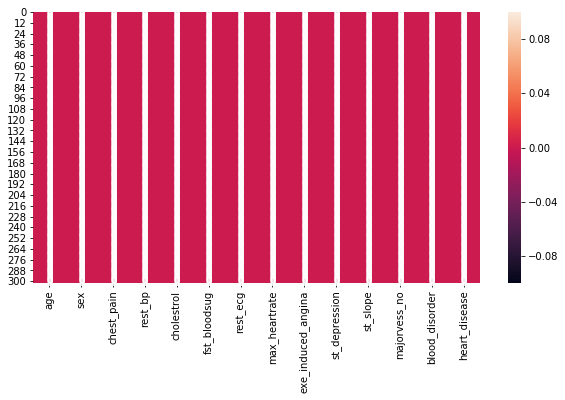

In [9]:
ax=plt.subplots(figsize=(10,5))
sns.heatmap(df.isnull(), annot=True)

In [10]:
#printing data characteristics, usings pandas built-in describe() function
#exploring the data statistically

df.describe()

,age,sex,chest_pain,rest_bp,cholestrol,fst_bloodsug,rest_ecg,max_heartrate,exe_induced_angina,st_depression,st_slope,majorvess_no,blood_disorder,heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis 

## Count Plot - People affected with Heart Disease

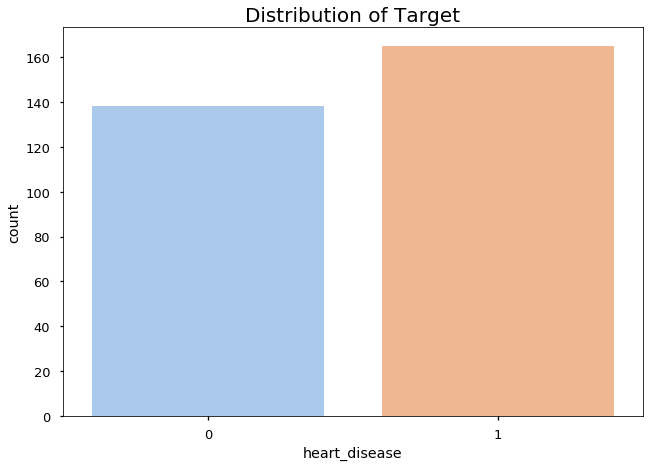

In [11]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('seaborn-talk')
sns.countplot(df['heart_disease'], palette = 'pastel')
plt.title('Distribution of Target', fontsize = 20)
plt.show()

Observation:<br>
1) People afftected by heart disease are more.<br>
2) There are above 160 patients suffering from heart disease. <br>
3) There are about 130 patients who do not have any heart disease.

## Bar Graph and Count Plot - For Sex vs Heart dieases  

Text(0, 0.5, 'count')

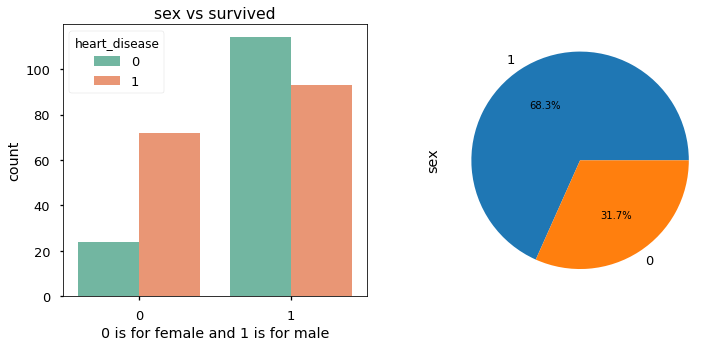

In [12]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
df['sex'].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%')
ax[0].set_title("sex vs survived")
sns.countplot(data=df,x='sex',hue='heart_disease',palette='Set2',ax=ax[0])
ax[0].set_xlabel("0 is for female and 1 is for male")
ax[0].set_ylabel("count")


Observation:<br>
1) Number of males affected by heart- diseases are more than females<br>
2) 93 Males and 72 Females are affected by heart dieases<br>

## Variation of values across the DataFrame for first 50 values

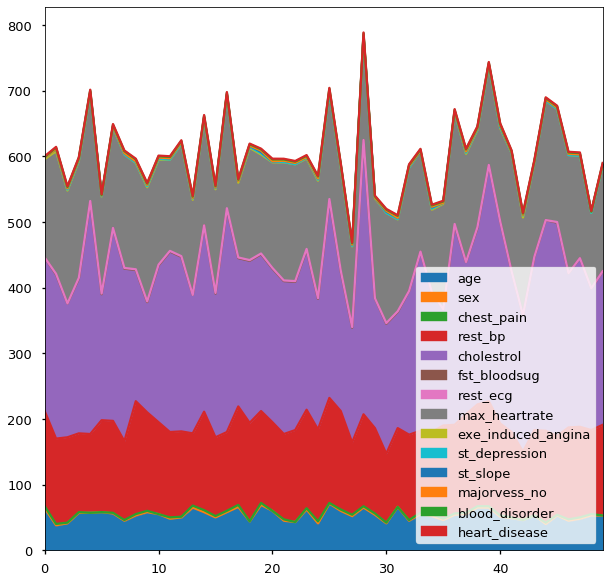

In [19]:
df.head(50).plot(kind='area',figsize=(10,10))

Observation:<br>
1)There is maximum variation in values cholestrol > max_heartrate > rest_bp 

## Subplots for each feature of dataset

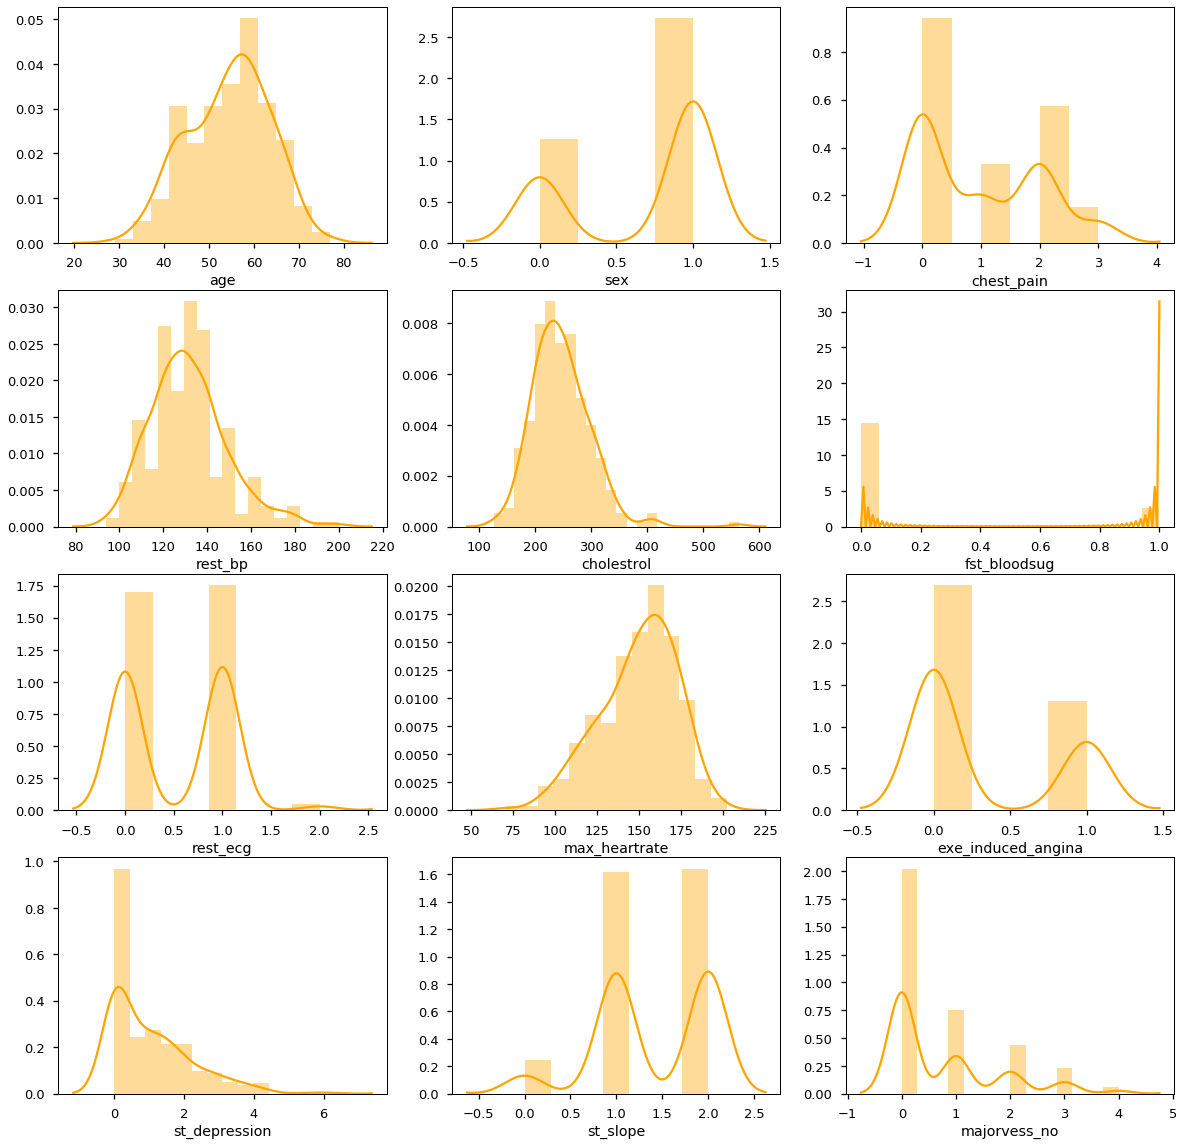

In [49]:
ax=plt.subplots(4,3,figsize=(20,20))
for i in range(12):
    plt.subplot(4,3,i+1)
    sns.distplot(df.iloc[:,i],kde=True, color='orange')


Observation - <br>
1) It can be seen that many of the attributes are evenly distributed accross the objects.<br>
2) There are many data points for males than females.<br>

## Countplot - We are only analyzing the cases where the person had a heart disease

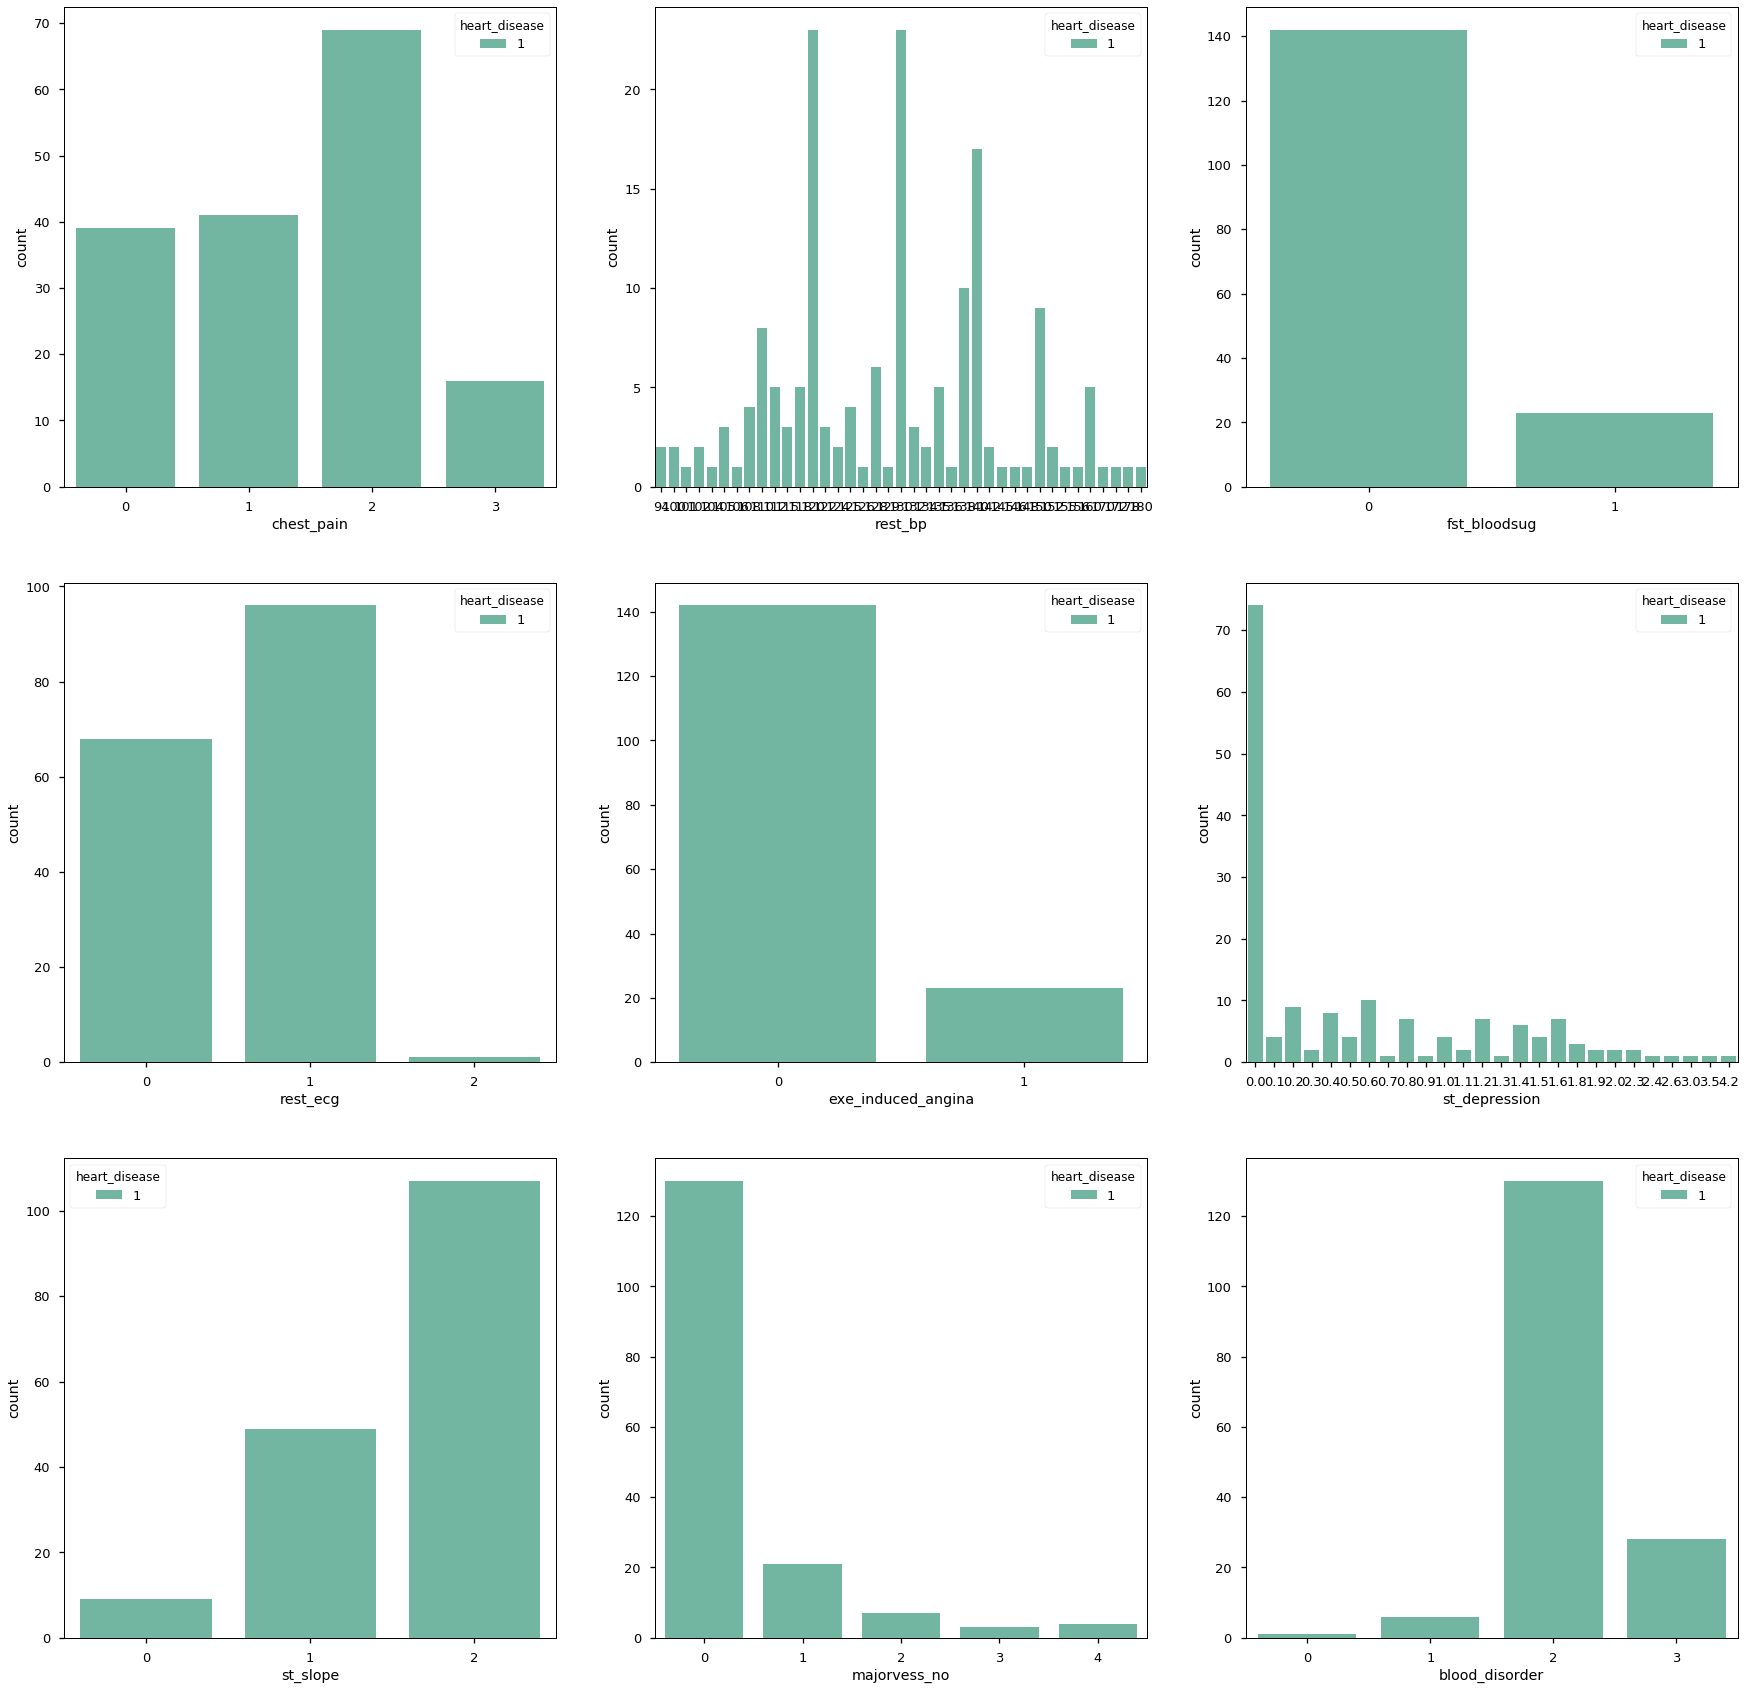

In [50]:
heart_disease_plot_df=df[df.heart_disease != 0]
heart_disease_plot_df=heart_disease_plot_df.drop('age', axis=1)
heart_disease_plot_df=heart_disease_plot_df.drop('sex', axis=1)
heart_disease_plot_df=heart_disease_plot_df.drop('cholestrol', axis=1)
heart_disease_plot_df=heart_disease_plot_df.drop('max_heartrate', axis=1)
ax=plt.subplots(3,3,figsize=(30,30))
for i in range(9):
    plt.subplot(3,3,i+1)
    sns.countplot(x=heart_disease_plot_df.iloc[:,i],data = heart_disease_plot_df, hue = 'heart_disease',palette='Set2')
    
plt.show()

Observations - <br>
1) Number of people having non-anginal chest pain having heart diseases is higher <br>
2) We can also see that people having a lower resting bp have a lower count of having a heart disease & vice-versa<br>
3) Lot many people having a lower blood sugar have heart diseases<br>
4) The count of people having heart disease due to non-exercise induced angina is more.<br>
5) There are many cases of people having heart diseases with Downsloping i.e. sign of unhealthy heart<br>
6) Many people having lower number of major blood vessels, had heart disease.<br> 

## Univariate graph for age

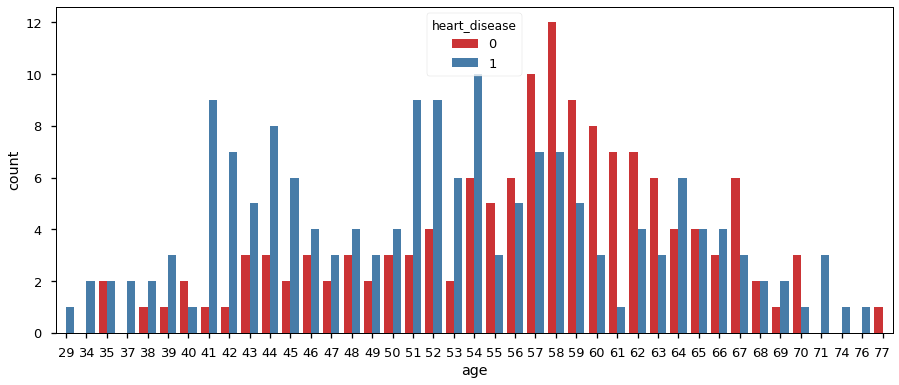

In [51]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'heart_disease',palette='Set1')
sns.set_context("paper", font_scale=1.4)
plt.show()

Observation:<br>
1) Patients from age 29 years to 77 years were included in this data set. The Histogram of age is little skewed to the left,showing the average age is little lower than the median age. Around 50% of patients’ age was in between 45-65 years. <br>
2) We can see that the number of people having heart diseases also rises with age.

# Heatmap: Correlation between all parameters of dataset.


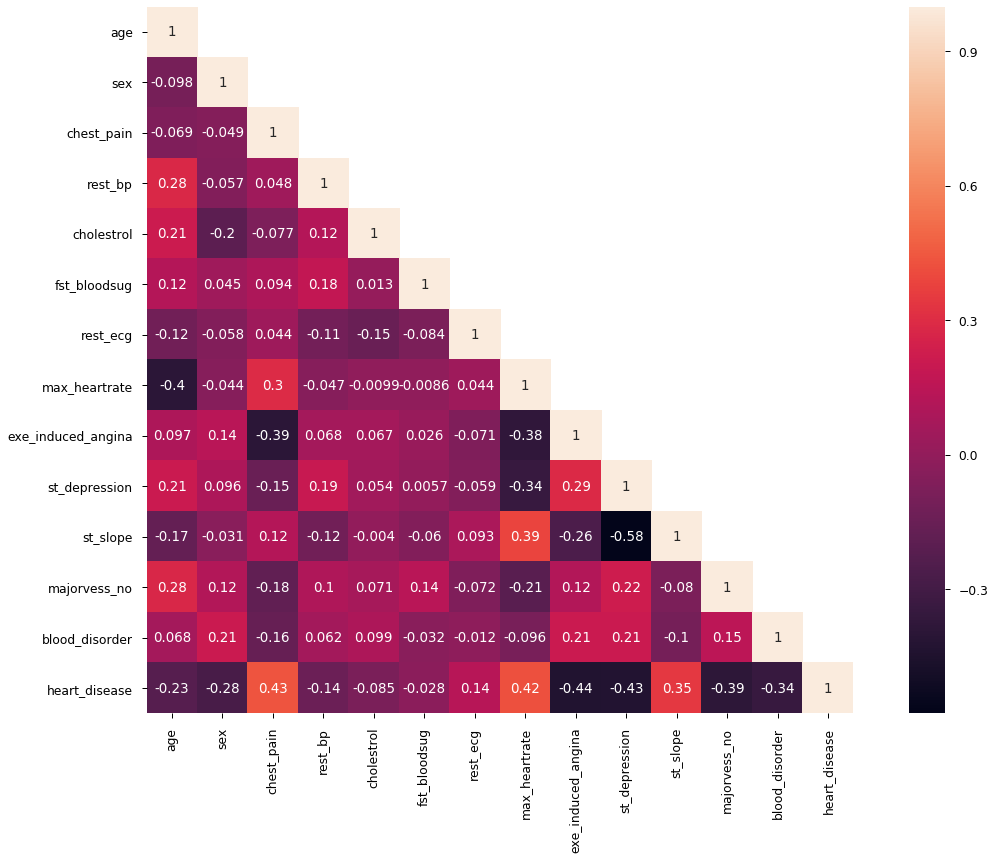

In [52]:
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(20,13)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

Observations - <br>
1) We can see that there is a positive corelation of the people having heart disease with -
- chest_pain
- max_heartrate
- st_slope <br>
This was also evidently seen in the countplots above.

2) We can also see that there is a strong negative correlation of people having heart diseases with -
- exe_induced_angina
- st_depression
- majorvess_no <br>
This was also evidently seen in the countplots above. We had seen that there was higher count of people with heart diseases with lower the number of major blood vessels.

3) We also see a negative correlation between resting blood pressure, which is evident from the fact that a lower resting blood pressure is an indication of a healthy heart.


# Analysis in Tableau

## Relation between Chest Pain, Heart Disease and Age

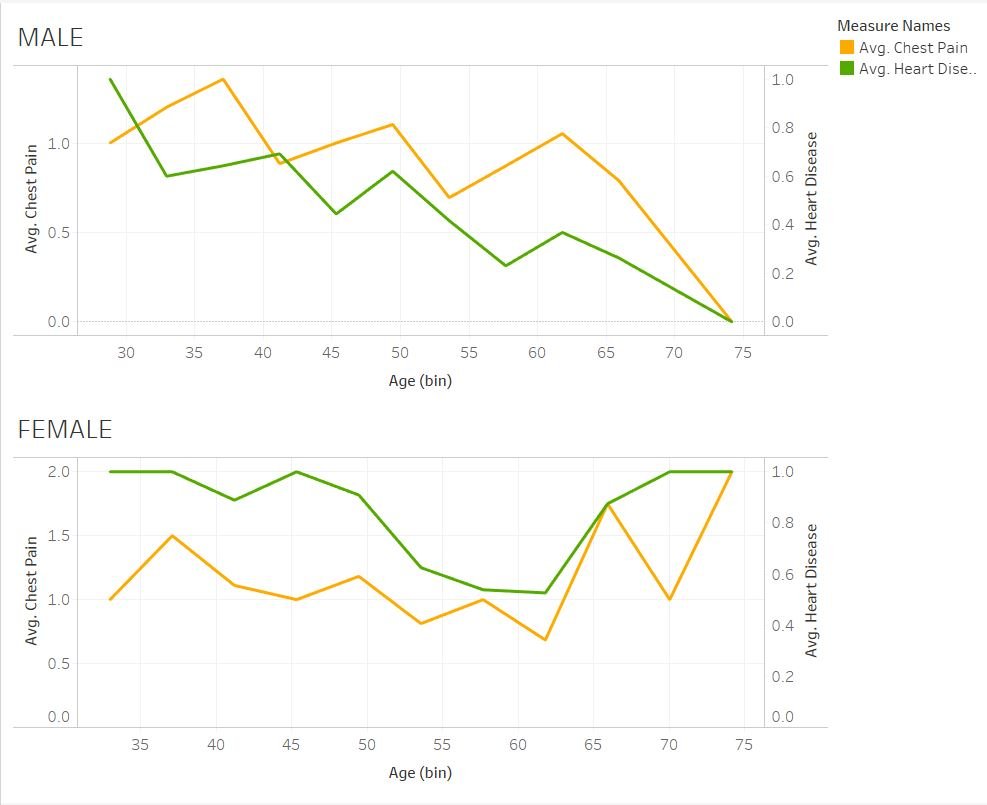

In [53]:
Image(filename=r'C:\Users\tanvi\Desktop\tableau1.JPG') 

Observation:<br>
1) Chest pain and Heart Disease is strongly and positively co-related. <br>
2) As the chest pain increases, one is more prone to having Heart Disease.

## Relationship between Cholestrol and Induced Angina

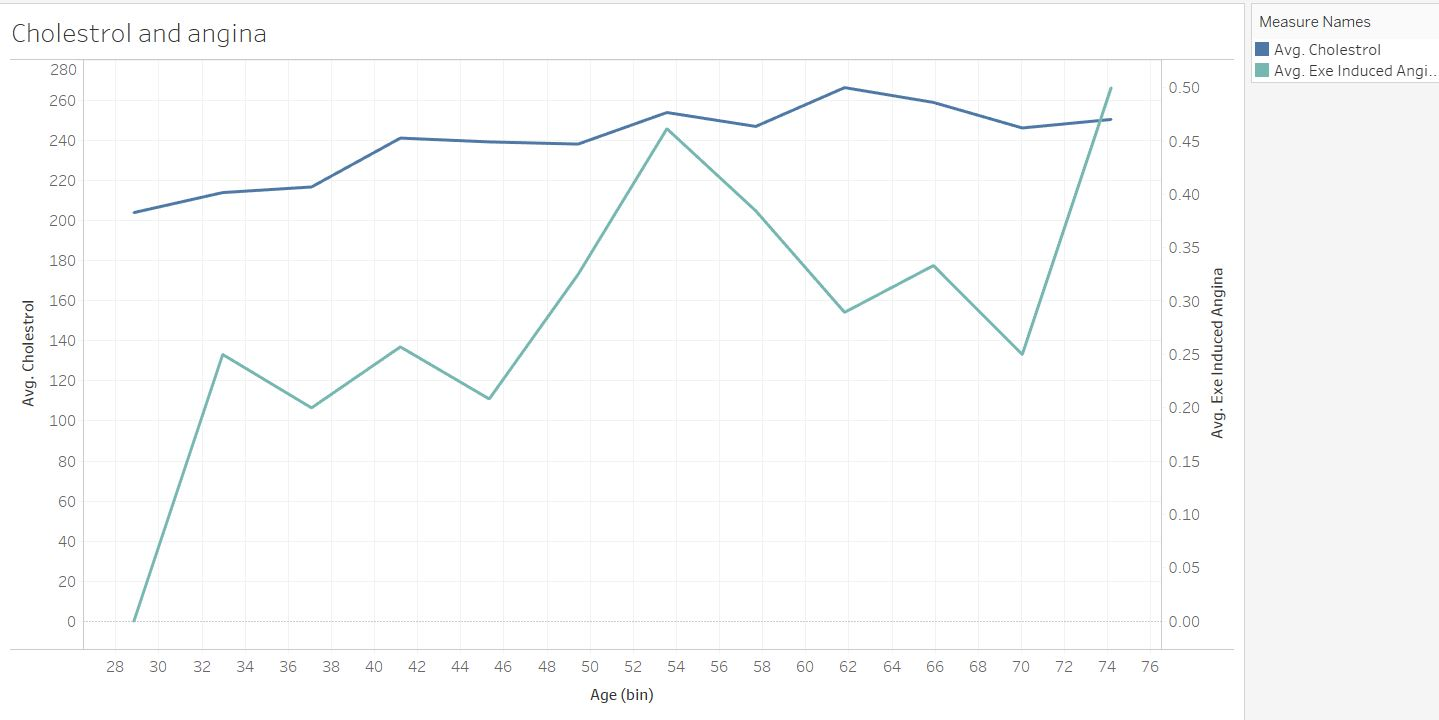

In [54]:
Image(filename=r'C:\Users\tanvi\Desktop\tableau2.JPG') 

Observation:<br>
1) It is observed that Cholestrol and Induced Angina are related to each other.<br>
2) As the level of Cholestrol Increases, Induced Angina also increases.

## Scatterplot: Relationship between age and maximum heartrate acheived

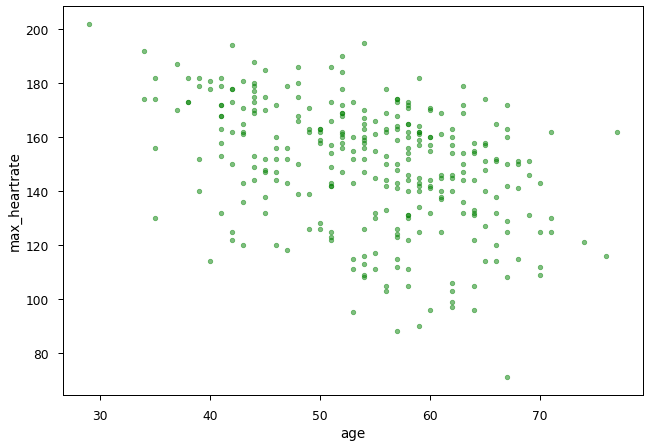

In [55]:
df.plot(kind='scatter', x='age', y='max_heartrate', color='green', alpha=0.5)

Observation:<br>
1) We can see that with age the max heart rate also increases. 

## Scatterplot - Relationship between age and blood pressure

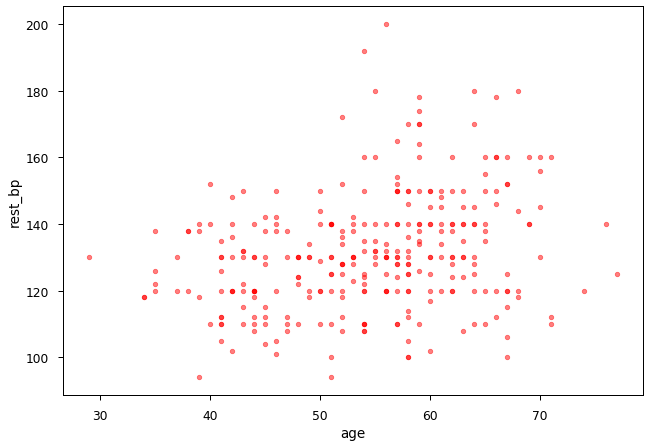

In [56]:
df.plot(kind='scatter', x='age', y='rest_bp', color='red', alpha=0.5)

Observation:<br>
1) More people have higher blood pressure as they age

## Boxplot: Relationship between age, sex and chestpain

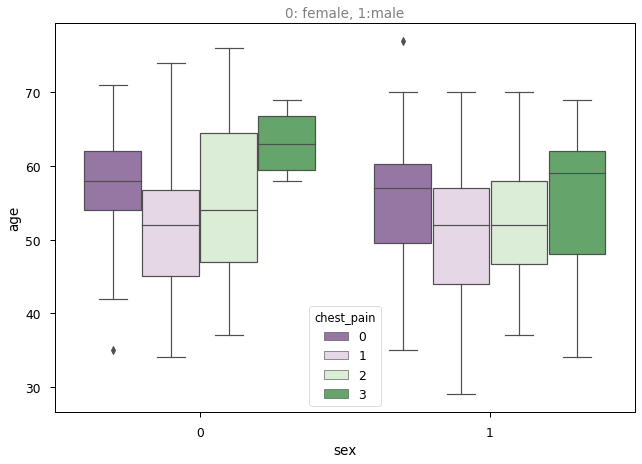

In [57]:
sns.boxplot(x="sex", y="age", hue="chest_pain", data=df, palette="PRGn")
plt.title("0: female, 1:male",color="gray")
plt.show()


Observation:<br>
1) Typical angina( type - 0 ) - It is observed that men start experiencing Typical anginga at an early age.<br>
2) Atypical angina ( type - 1) -  that is chest pain not related to heart is observed between the age of 45 to 55.<br>
3) Non-anginal pain (type -2)  that is typically esophageal spasms (non heart related), it is observered among a wide range of age of women, and progresses as the womans age increases. <br>
4) Asymptomatic angina i.e. chest pain not showing signs of disease - Men have Asymptomatic angina at an earlier age than woman. 

# Pre-processing- Standardization, or mean removal and variance scaling


* To work with categorical variables, we should break each categorical column into dummy columns with 1s and 0s.
* Let’s say we have a column Gender, with values 1 for Male and 0 for Female. It needs to be converted into two columns with the value 1 where the column would be true and 0 where it will be false.
* I used the get_dummies() method from pandas. 
* I have scaled the dataset for which I have used the StandardScaler. The fit_transform() method of the scaler scales the data and we update the columns.

In [58]:
df = pd.get_dummies(df, columns = ['sex', 'chest_pain', 'fst_bloodsug', 'rest_ecg','exe_induced_angina', 'st_slope', 'majorvess_no', 'blood_disorder'])

In [59]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
columns_to_scale = ['age', 'rest_bp', 'cholestrol', 'max_heartrate', 'st_depression']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

# Creating Training and Testing Datasets


Now that we have preprocessed the data appropriately, we can split it into training and testings datasets. We will use Sklearn's train_test_split() function to generate a training dataset (80 percent of the total data) and testing dataset (20 percent of the total data).

In [60]:
y = df['heart_disease']
X = df.drop(['heart_disease'], axis = 1)

In [61]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

# Model Building

# 1) Logistic Regression

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        30
           1       0.91      0.94      0.92        31

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



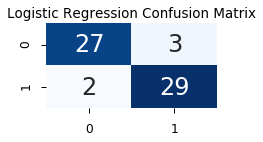

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cnf_matrix = confusion_matrix(y_test, y_pred)
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(classification_report(y_test, y_pred))
cm_LR = confusion_matrix(y_test,y_pred)
plt.subplot(4,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_LR,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


# 2) Support Vector Machine (Linear)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        30
           1       0.90      0.90      0.90        31

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



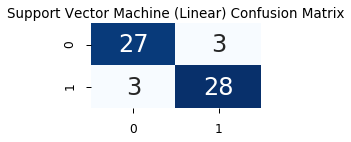

In [63]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(classification_report(y_test, y_pred))
cm_sv = confusion_matrix(y_test,y_pred)
plt.subplot(4,3,1)
plt.title("Support Vector Machine (Linear) Confusion Matrix")
sns.heatmap(cm_sv,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

# 3) Support Vector Machine(RBF)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        30
           1       0.90      0.90      0.90        31

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



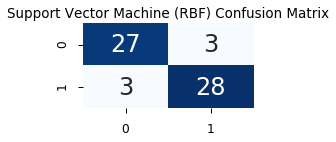

In [64]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(classification_report(y_test, y_pred))
cm_svr = confusion_matrix(y_test,y_pred)
plt.subplot(4,3,1)
plt.title("Support Vector Machine (RBF) Confusion Matrix")
sns.heatmap(cm_svr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

# 4) Random Forest 

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.88      0.90      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.89        61
weighted avg       0.89      0.89      0.89        61



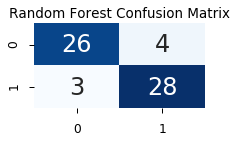

In [65]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(classification_report(y_test, y_pred))
cm_rf = confusion_matrix(y_test,y_pred)
plt.subplot(4,3,1)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

# 5) Naive Bayes

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        30
           1       0.78      0.94      0.85        31

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



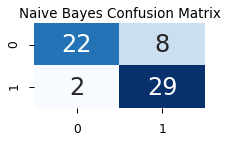

In [66]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Naive Bayes', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(classification_report(y_test, y_pred))
cm_LR = confusion_matrix(y_test,y_pred)
plt.subplot(4,3,1)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_LR,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

# 6) Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        30
           1       0.87      0.84      0.85        31

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



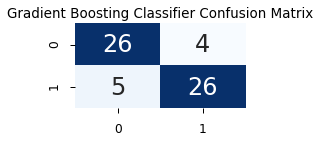

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Gradient Boosting Classifier', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(classification_report(y_test, y_pred))
cm_LR = confusion_matrix(y_test,y_pred)
plt.subplot(4,3,1)
plt.title("Gradient Boosting Classifier Confusion Matrix")
sns.heatmap(cm_LR,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

# 7) K-Nearest Neighbour

              precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       0.90      0.87      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

[[27  3]
 [ 4 27]]


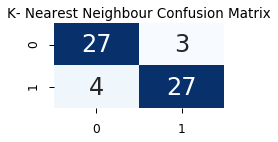

In [68]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['K- Nearest Classifier', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
cm_LR = confusion_matrix(y_test,y_pred)
plt.subplot(4,3,1)
plt.title("K- Nearest Neighbour Confusion Matrix")
sns.heatmap(cm_LR,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


# 8) Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini') 
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                          Model  Accuracy  Precision    Recall  F1 Score
0           Logistic Regression  0.918033   0.906250  0.935484  0.920635
1                  SVM (Linear)  0.901639   0.903226  0.903226  0.903226
2                     SVM (RBF)  0.901639   0.903226  0.903226  0.903226
3         Random Forest (n=100)  0.885246   0.875000  0.903226  0.888889
4                   Naive Bayes  0.836066   0.783784  0.935484  0.852941
5  Gradient Boosting Classifier  0.852459   0.866667  0.838710  0.852459
6         K- Nearest Classifier  0.885246   0.900000  0.870968  0.885246
7                 Decision Tree  0.852459   0.823529  0.903226  0.861538


# Comparison Table

In [70]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.918033,0.906250,0.935484,0.920635
1,SVM (Linear),0.901639,0.903226,0.903226,0.903226
2,SVM (RBF),0.901639,0.903226,0.903226,0.903226
3,Random Forest (n=100),0.885246,0.875000,0.903226,0.888889
4,Naive Bayes,0.836066,0.783784,0.935484,0.852941
5,Gradient Boosting Classifier,0.852459,0.866667,0.838710,0.852459
6,K- Nearest Classifier,0.885246,0.900000,0.870968,0.885246
7,Decision Tree,0.852459,0.823529,0.903226,0.861538
8,Decision Tree,0.852459,0.823529,0.903226,0.861538


# Comparison between the models

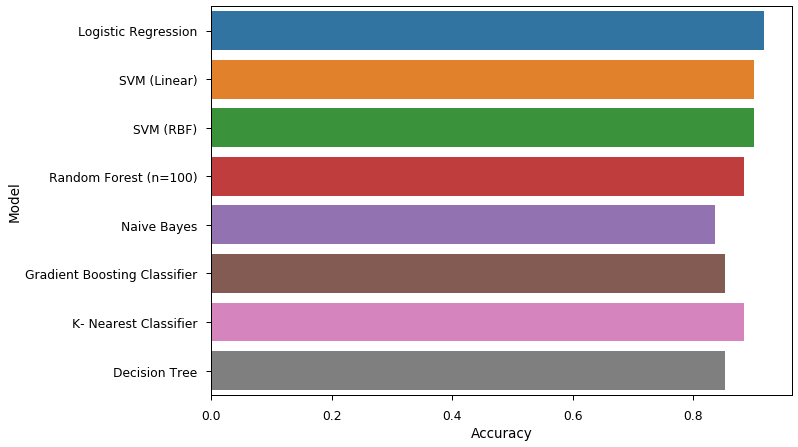

In [71]:
sns.barplot(y='Model',x='Accuracy',data=results)

# Conclusion

The project involved analysis of the heart disease patient dataset with proper data processing. Various factors/metrics related to heart such as angina type, major blood vessels, resting blood pressure, max heart rate, etc were analyzed. From the correlation plot, there was a positive and negative correlation observed between the heart related parameters and the count of heart diseases, which was also evident from the count plots. 

To build a classification-prediction model, 8 models were trained and tested with their accuracy as follows:<br><br>
1) Logistic Regression  : 91 % <br>
2) Support Vector Machine (linear) : 90 %<br>
3) Support Vector Machine (RBF) : 65 %<br>
4) Random Forest: 88 %<br>
5) Naive Bayes: 86 %<br>
6) Gradient Boosting Classifier: 85 %<br>
7) K- Nearest Neighbour : 63 %<br>
8) Decision Tree : 81%<br>

<br>
It was obserseved that Logistic Regression had the highest accuracy of 91%


# Future Scope

1) The current dataset was skewed on some attributes. The model needs to be trained/tested with a larger dataset.<br>
2) The model could be improved by using a Neural Network Model, e.g. using Convolutional Neural Network as with a higher epoch a higher accuracy can be obtained.<br>
3) For display purposes, can create a small web application using Flask using Python with a simple HTML page, accepting the input metrics such as max_heartrate, resting blood pressure, major blood vessel counts, etc and the classifier model can display the probability of the person having a heart disease.
 
 